In [1]:
import numpy as np
import pandas as pd
import scipy
from plotnine import *

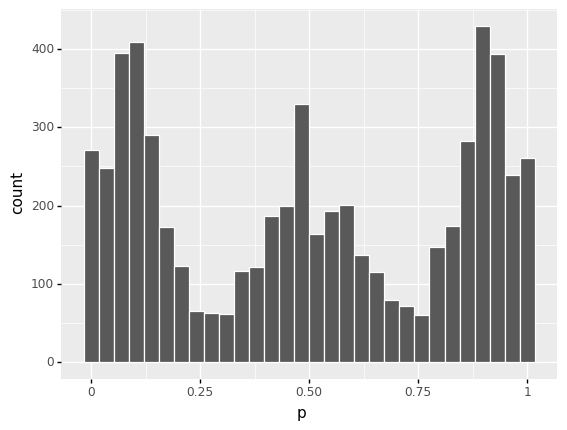

<ggplot: (8771919028146)>

In [4]:
samples = 2000

ns1 = np.random.poisson(20,samples)
ns2 = np.random.poisson(20,samples)
ns3 = np.random.poisson(20,samples)

k1 = np.random.binomial(ns1, 0.5, samples)
k2 = np.random.binomial(ns2, 0.1, samples)
k3 = np.random.binomial(ns3, 0.9, samples)

ns = []
ns.extend(ns1)
ns.extend(ns2)
ns.extend(ns3)
ks = []
ks.extend(k1)
ks.extend(k2)
ks.extend(k3)
p = np.asarray(ks) / np.asarray(ns)
dataframe = pd.DataFrame(data={'n':ns, 'k':ks, 'p':p})

ggplot(dataframe)+geom_histogram(aes(x='p'),color="white",bins = 30)

In [7]:
len(dataframe)

6000

In [56]:
ps = np.random.uniform(size=3)
ps

array([0.19919793, 0.56462821, 0.62344685])

In [8]:
log_priors = [np.log(1/3)]*3
log_priors

[-1.0986122886681098, -1.0986122886681098, -1.0986122886681098]

In [25]:
def expectation(data, ps):
    all_posteriors = []
    for i in range(len(data)):
        posteriors = calc_posteriors(data['n'][i], data['k'][i], ps, log_priors)
        all_posteriors.append(posteriors)
    return all_posteriors

In [29]:
def calc_posteriors(n,k,ps,log_priors):
    log_likelihoods = scipy.stats.binom.logpmf(k,n,ps)
    log_posteriors = []
    log_marginal_likelihoods = log_likelihoods + log_priors
    for (i, log_likelihood) in enumerate(log_likelihoods):
        log_posteriors.append(log_likelihood + log_priors[i] - 
            scipy.special.logsumexp(log_marginal_likelihoods))
    return np.exp(log_posteriors)
        

In [31]:
def maximization(all_posteriors, data, ps):
    k_primes = [0]*3
    n_primes = [0]*3
    for i in range(len(all_posteriors)):
        for (j, posterior) in enumerate(all_posteriors[i]):
            k_primes[j] += posterior * data['k'][i]
            n_primes[j] += posterior * data['n'][i]
            
    p_primes = [k_primes[i]/n_primes[i] for i in range(3)]
    return p_primes
        

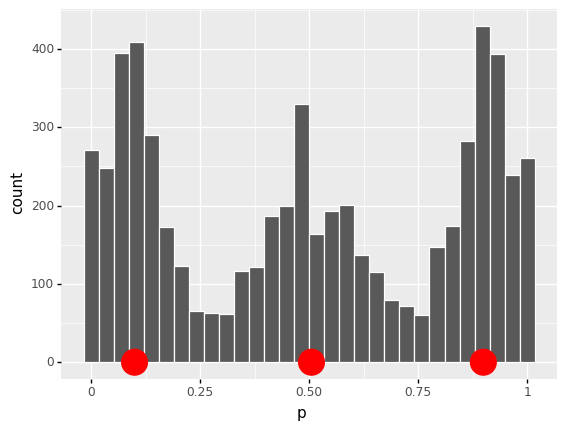

<ggplot: (8771921078724)>

In [67]:
p_data = pd.DataFrame(data={'p':ps,'y':[0]*3})
(ggplot(dataframe)+geom_histogram(aes(x='p'),color="white",bins = 30)+
  geom_point(aes(x='p',y='y'), data = p_data ,color="red", size = 10))

In [66]:
all_posteriors = expectation(dataframe, ps)
ps = maximization(all_posteriors, dataframe, ps)